In [1]:
from pymongo import MongoClient

In [2]:
klient = MongoClient("mongodb://localhost:27017")

In [3]:
bazaDanych = klient['bazaN4211_2021']

In [4]:
kolekcja = bazaDanych.wstep

In [5]:
dokument = {"nr_indeksu":"260711",
            "grupa":"11"}

In [6]:
rezultat = kolekcja.insert_one(dokument)

ServerSelectionTimeoutError: localhost:27017: [WinError 10061] Nie można nawiązać połączenia, ponieważ komputer docelowy aktywnie go odmawia, Timeout: 30s, Topology Description: <TopologyDescription id: 61e0d37a6d7d17f17cedccad, topology_type: Single, servers: [<ServerDescription ('localhost', 27017) server_type: Unknown, rtt: None, error=AutoReconnect('localhost:27017: [WinError 10061] Nie można nawiązać połączenia, ponieważ komputer docelowy aktywnie go odmawia')>]>

In [10]:
print(bazaDanych.wstep.count_documents({}))

24


In [21]:
wynik = bazaDanych.wstep.find({"nr_indeksu":"260711"})

In [22]:
for w in wynik:
    print(w)

{'_id': ObjectId('61ac688577fc44033355d4f7'), 'nr_indeksu': '260711', 'grupa': '11'}


In [23]:
# TABELA - KOLEKCJA
# WIERSZ - DOKUMENT
# KOLUMNA - POLE

In [24]:
# Zadanie 1. Zaimportuj bibliotekę pymongo i zdefiniuj obiekt klienta.
from pymongo import MongoClient 
# Zadanie 2. Podłącz się do lokalnego serwera (localhost) na porcie 27017, protokół mongodb.
klient = MongoClient("mongodb://localhost:27017")

In [25]:
# Zadanie 3. Zdefiniuj lub utworz bazę baza_TwojeImieN
bazaDanych = klient['baza_SzymonK'] 

In [27]:
# Zadanie 4. Wstaw dane studenta: nr indeksu 200200, imię: Jan, nazwisko: Kowalski
bazaDanych.student.insert_one({'nr_indeksu':200200, 'imie':'Jan','nazwisko':'Kowalski'})

In [29]:
# Zadanie 5. Analogicznie dodaj trzech kolejnych studentów.

bazaDanych.student.insert_many([
    {'nr_indeksu':200201,'imie':'Adam','nazwisko':'Nowak'},
    {'nr_indeksu':200202,'imie':'Ada','nazwisko':'Nowak'},
    {'nr_indeksu':200203,'imie':'Arek','nazwisko':'Nowak'}
])

In [31]:
# Zadanie 6. Wyszukaj studenta o nazwisku Nowak.

print(bazaDanych.student.find_one({'nazwisko':'Nowak'}))

{'_id': ObjectId('61ac6e5377fc44033355d4fa'), 'nr_indeksu': 200201, 'imie': 'Adam', 'nazwisko': 'Nowak'}


In [36]:
# Zadanie 7. Wyszukaj wszystkich studentów o nazwisku Nowak.
for w in bazaDanych.student.find({'nazwisko':'Nowak'}):
    print(w['imie'], w['nazwisko'], w['nr_indeksu'])

Adam Nowak 200201
Ada Nowak 200202
Arek Nowak 200203


In [38]:
# Zadanie 8. Zaimportuj dane z pliku XLS do bazy mongodb.
import pandas as pd
df=pd.read_excel("bazawielowymiarowa.xls")

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


In [39]:
bazaDanych = klient['bazaXLS_SzymonK']

In [42]:
df.head(1)

,ID_CZAS_FK,ID_MIEJSCE_FK,ID_ZMIENNA_FK,ID_JEDNOSTKA_MIARY_FK,WARTOSC,id_czas_pk,rok,miesiac,miesiac_nazwa,kwartal,...,symbol_jednostki_miary,opis_jednostki_miary,mnoznik_jednostki_miary,id_miejsce_pk,region,wojewodztwo,id_zmienna_pk,nazwa_zmiennej,rodzaj_zmiennej,opis
0,101,4,1,1,27.0,101,2000,1,styczeń,1,...,szt.,liczba sztuk,1,4,północno - zachodni,Lubuskie,1,ołówek,liczbowa,liczba sprzedanych ołówków


In [40]:
for index, row in df.iterrows():
    dokument={'rok':row['rok'],'wartosc':row['WARTOSC']}
    bazaDanych.xls.insert_one(dokument)
print("Zakonczono wstawianie")    

Zakonczono wstawianie


In [44]:
# Zadanie 9. Wyświetl zawartość kolekcji.
print(bazaDanych.xls.find_one({'rok':2000}))

{'_id': ObjectId('61ac711277fc44033355d4fd'), 'rok': 2000, 'wartosc': 27.0}


In [45]:
# Zadanie 10. Przygotuj kolekcję w celu pobierania stron internetowych i ich zawartości.
stronawww = {'url':'', 'content':'','date':''}

In [46]:
# Zadanie 11. Zrób prosty web scraping stron internetowych i zapisz je w bazie NoSQL.
import requests
import datetime
www=['http://wzr.pl','https://www.pracuj.pl', 'https://www.onet.pl']
bd = klient['bazawww_N4211']
for strona in www:
    r = requests.get(strona)
    teraz = datetime.datetime.today()
    stronawww={'url':strona,
              'content':r.text,
              'date':teraz}
    rezultat = bd.www.insert_one(stronawww)
    print(rezultat)
print("Zakonczono wstawianie")

Zakonczono wstawianie


{'_id': ObjectId('61ac74e077fc4403335696ff'), 'url': 'https://www.pracuj.pl', 'content': '<!DOCTYPE html><html lang="pl"><head><meta charset="utf-8"><link href="https://cdnjs.cloudflare.com" rel="preconnect" crossorigin=""><link href="https://kansas.gpcdn.pl" rel="preconnect" crossorigin=""><link href="https://i.gpcdn.pl" rel="preconnect" crossorigin=""><link href="https://fonts.gstatic.com" rel="preconnect" crossorigin=""><meta http-equiv="x-ua-compatible" content="ie=edge"><meta name="format-detection" content="telephone=no"><title>Praca - Pracuj.pl</title><meta name="description" content="Pracuj.pl - praca dla specjalistÃ³w i menedÅ¼erÃ³w w Polsce i za granicÄ\x85. SprawdÅº, czy nie szukasz i znajdÅº wymarzonÄ\x85 pracÄ\x99."><meta name="viewport" content="width=device-width,initial-scale=1,maximum-scale=5"><link rel="icon" type="image/x-icon" href="https://www.pracuj.pl/favicon.ico"><link rel="canonical" href="https://www.pracuj.pl"><meta name="robots" content="index,follow,all"><m
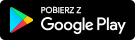
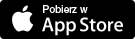
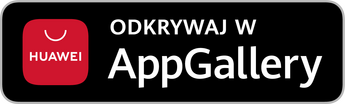

In [49]:
# Zadanie 12. Wyświetl jedną z podanych stron internetowych.
print(bd.www.find_one({'url':'https://www.pracuj.pl'}))

In [51]:
wynik = bd.www.find({})
for w in wynik:
    print(w['url'])
    if 'covid' in w['content'].lower():
        print('TAK')
    else:
        print('NIE')

http://wzr.pl
NIE
https://www.pracuj.pl
NIE
https://www.onet.pl
TAK
https://pl.wikipedia.org/wiki/Dzi%C4%99cio%C5%82_czerwonobrody
NIE
https://pl.wikipedia.org/wiki/Nuorgam
NIE
https://www.flashscore.com/
NIE
https://pl.wikipedia.org/wiki/Chris_Hemsworth
NIE
https://pl.wikipedia.org/wiki/Zatoka_serc
NIE
https://pl.wikipedia.org/wiki/Opera_mydlana
NIE
https://www.chess.com/
NIE
https://lichess.org/
NIE
https://pl.wikipedia.org/wiki/Barbados
NIE
https://pl.wikipedia.org/wiki/Makaron_b%C5%82yskawiczny
NIE
https://pl.wikipedia.org/wiki/Czubajka_kania
NIE
https://pl.wikipedia.org/wiki/Dzi%C4%99cio%C5%82_czerwonobrody
NIE
http://wzr.pl
NIE
http://maslankowski.pl
NIE
http://ug.edu.pl
NIE
http://wzr.pl
NIE
https://www.wp.pl/
TAK
https://www.tvn.pl/
NIE
https://www.wp.pl/
TAK
http://praca.pl
NIE
http://pracuj.pl
NIE
https://sii.pl/
NIE
https://www.onet.pl/
TAK
http://nofluffjobs.com
TAK
https://www.wp.pl
TAK
https://www.interia.pl
TAK
https://www.onet.pl
TAK
http://wzr.pl
NIE
http://wzr.pl
NIE
